# Numerical 1-D FEM solution of the heat diffusion equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy.sparse import csr_matrix
from scipy import sparse
from numpy import array
from scipy.sparse.linalg import spsolve
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from tabulate import tabulate

First we define some numerical constants and define the problem

In [3]:
#constants
lx          = 10           #width
nnod        = 11           #number of nodes
nnodel      = 2            #nodes per element
k           = 1            #conductivity
Q           = 1            #source term
Tleft       = 0            #T boundary conditions
Trite       = 0

#numerics
nel         = nnod-1       #number of elements

Now we make our FEM mesh and element connectivity

In [4]:
Gcoord, dx  = np.linspace(0,lx,nnod,   retstep=True) #global coordinates
EL2NOD      = np.array([np.arange(0,nnod-1), np.arange(1,nnod)], dtype=int).T.copy()  # connectivity matrix

print(tabulate(EL2NOD, headers=['Element #', 'Node 1', 'Node 2'], showindex=True))

  Element #    Node 1    Node 2
-----------  --------  --------
          0         0         1
          1         1         2
          2         2         3
          3         3         4
          4         4         5
          5         5         6
          6         6         7
          7         7         8
          8         8         9
          9         9        10


Now we spell out our analytically-derived element stiffness matrix (see previous sections):

In [5]:
#Ael    = ???
#Rhs_el  = ???

In [6]:
# hide: the code in this cell is hidden by the author

Now we need to loop over all elements and assemble the global stiffness matrix

In [12]:
Rhs_all = np.zeros(nnod)

# Initialize I, J, and K arrays
I = np.zeros((nel, nnodel * nnodel), dtype=int)
J = np.zeros((nel, nnodel * nnodel), dtype=int)
K = np.zeros((nel, nnodel * nnodel))

# Loop over each element
for iel in range(nel):
    # Create connectivity indices for the current element
    I[iel, :] = np.tile(EL2NOD[iel, :], (nnodel, 1)).T.ravel()
    J[iel, :] = np.tile(EL2NOD[iel, :], (nnodel, 1)).ravel()
    K[iel, :] = Ael.reshape(nnodel * nnodel)
    
    # Assemble the global right-hand side vector
    Rhs_all[EL2NOD[iel, :]] += Rhs_el

# Create the global stiffness matrix using a sparse representation
A_all = sparse.csr_matrix((K.ravel(), (I.ravel(), J.ravel())), shape=(nnod, nnod))


Now we apply the boundary conditions in the usual way and solve using a sparse solver!

In [13]:
#Apply boundary conditions
#A_all??
#A_all??
#A_all??
# A_all??
#Rhs_all[0] = ?
#Rhs_all[-1] = ?

In [14]:
# hide: the code in this cell is hidden by the author

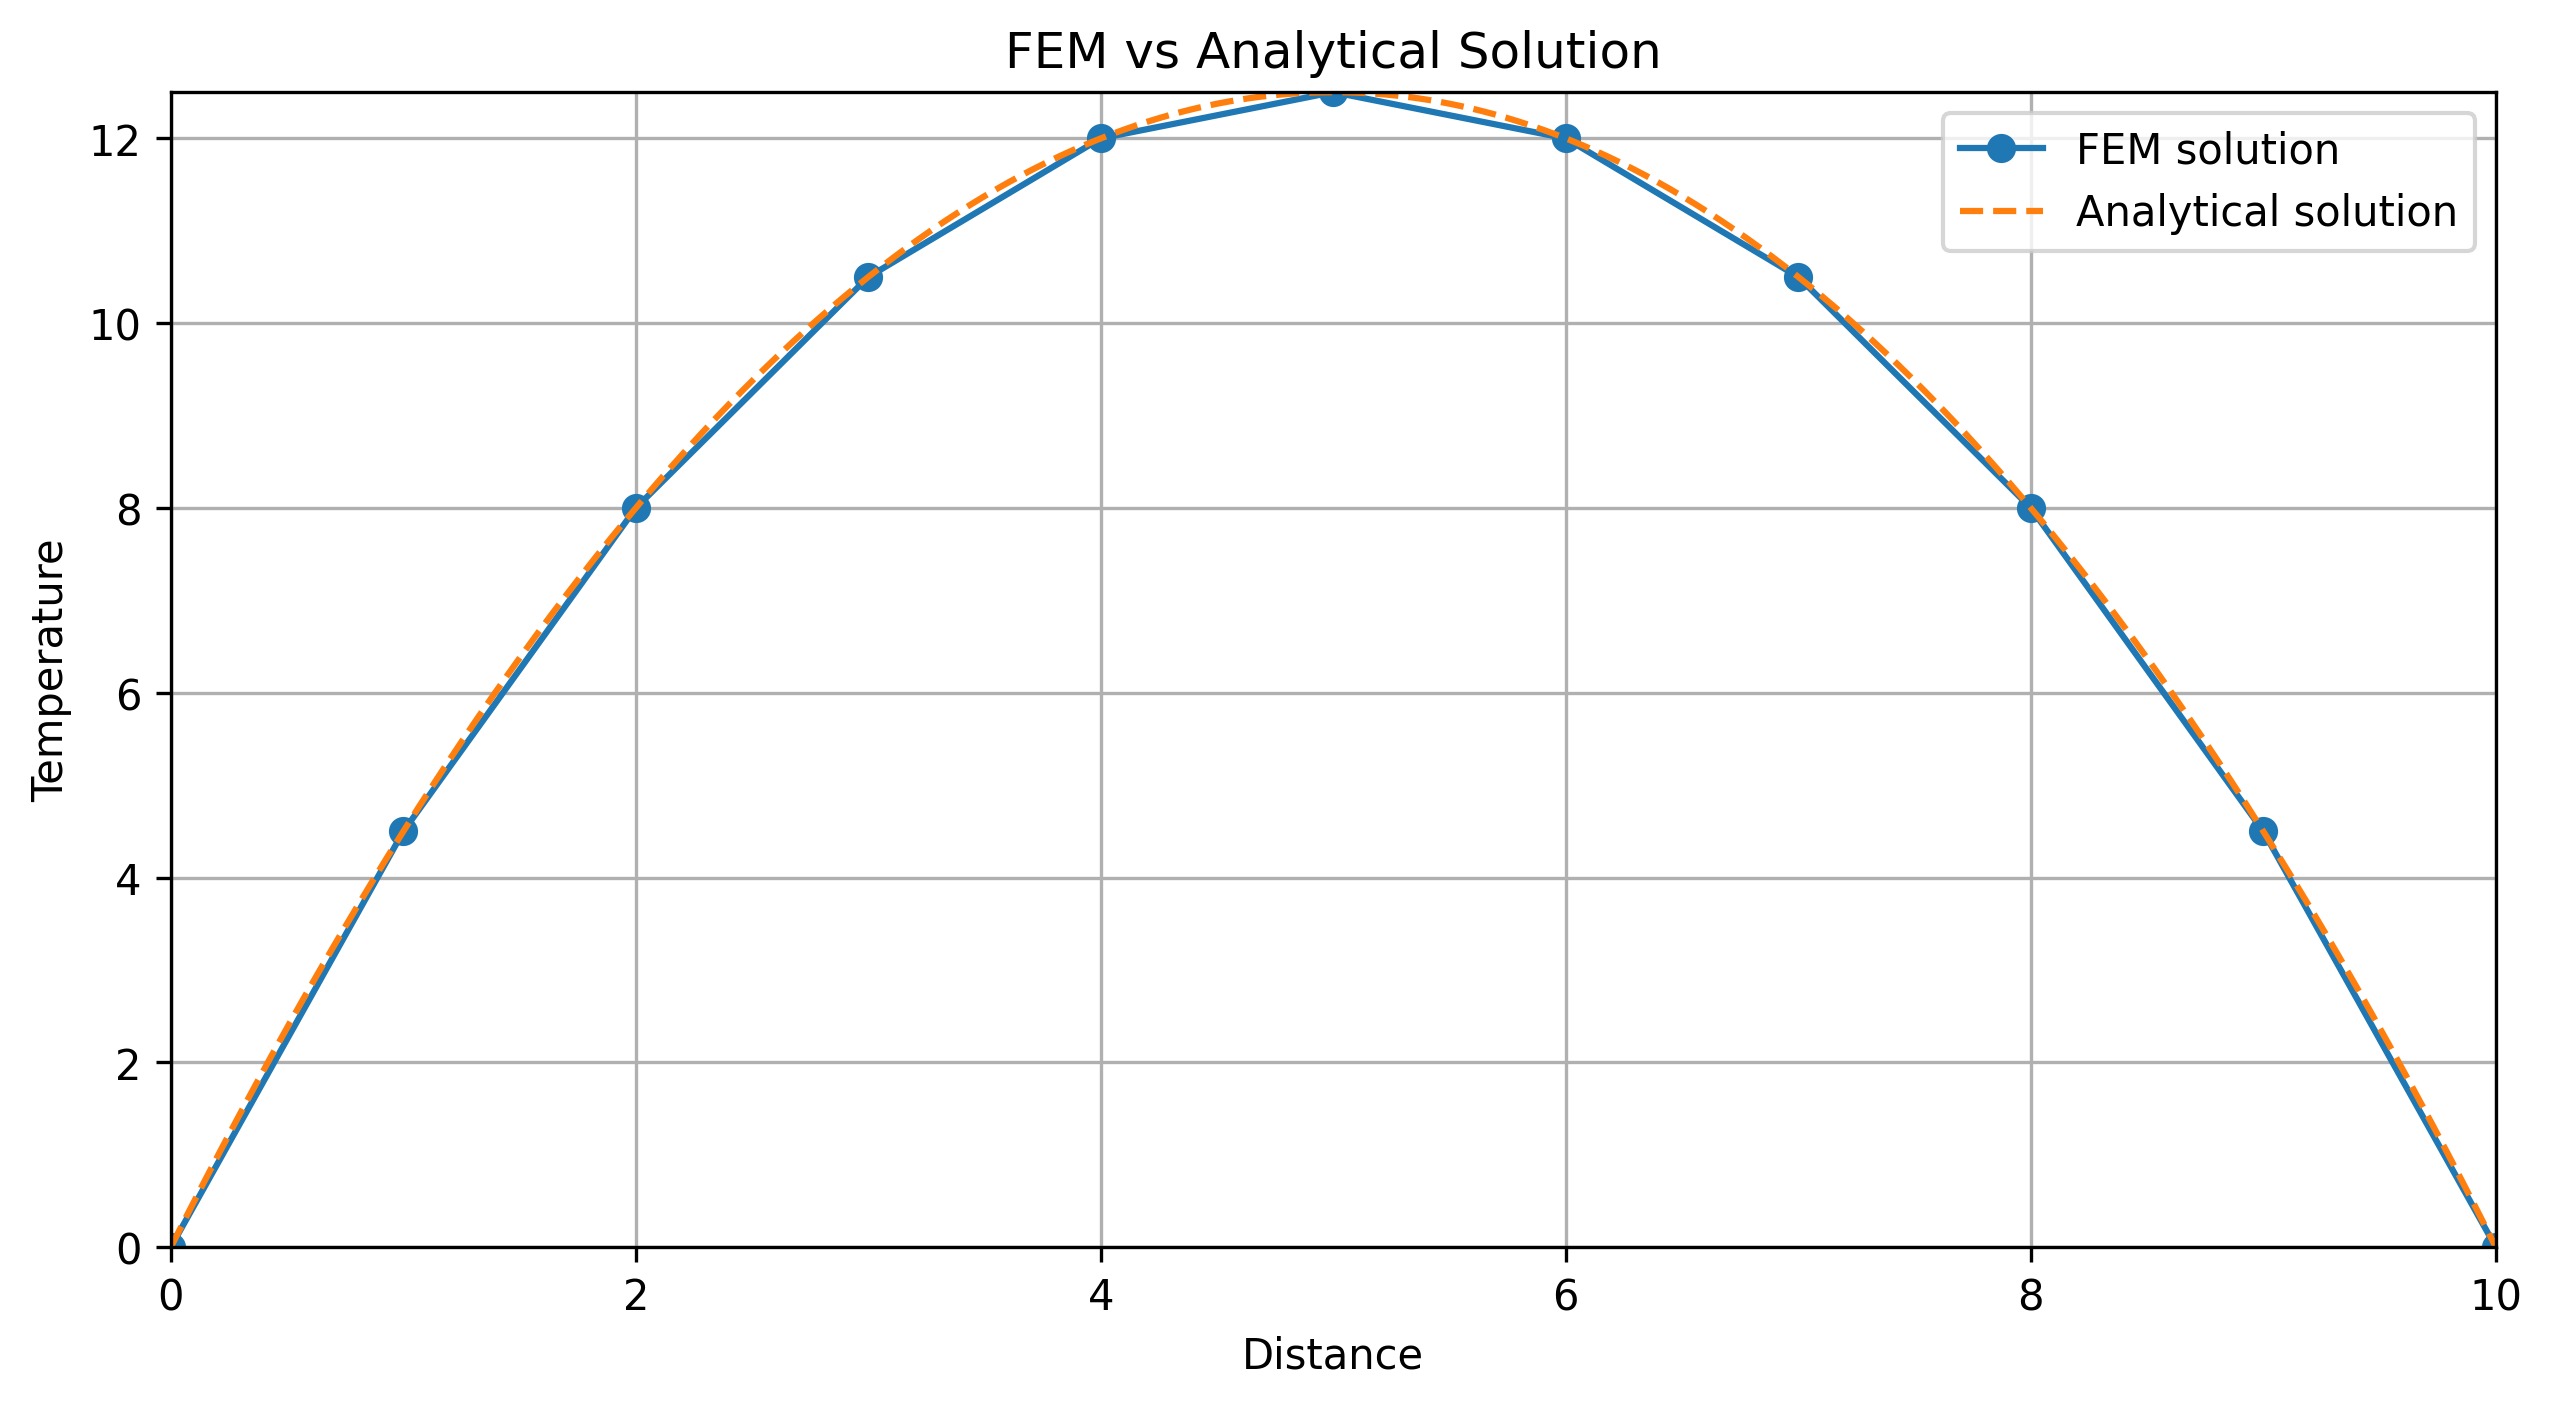

In [17]:
# and solve!

Tnew=spsolve(A_all,Rhs_all)

#Analytical solution
X     = np.linspace(0,lx, 100*nnod)
T_ana = -1/2*Q/k*np.square(X) + 1/2*Q/k*lx*X;

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, lx)
ax.set_ylim(min(Tnew.min(), T_ana.min()), max(Tnew.max(), T_ana.max()))
ax.set_xlabel('Distance')
ax.set_ylabel('Temperature')
ax.set_title('FEM vs Analytical Solution')

# Plot the FEM and analytical solutions
ax.plot(Gcoord, Tnew, label='FEM solution', marker='o', linestyle='-')
ax.plot(X, T_ana, label='Analytical solution', linestyle='--')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()
